#Load Dataset

In [ ]:
import pandas as pd


file_path = '/content/dataset danantara.csv'

# Membaca file CSV
df = pd.read_csv(file_path)
df = df.rename(columns={'full_text': 'Text_raw', 'Label': 'Label'})
df.head()

,Text_raw,Label
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2
2,Nasib Danantara ke depan jadi tanda tanya besa...,2
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2


#EDA(Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6805 entries, 0 to 6804
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text_raw  6805 non-null   object
 1   label     6805 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


**Cek Null**

In [ ]:
df.isnull().sum()

,0
Text_raw,0
label,0


**Distribusi Label**

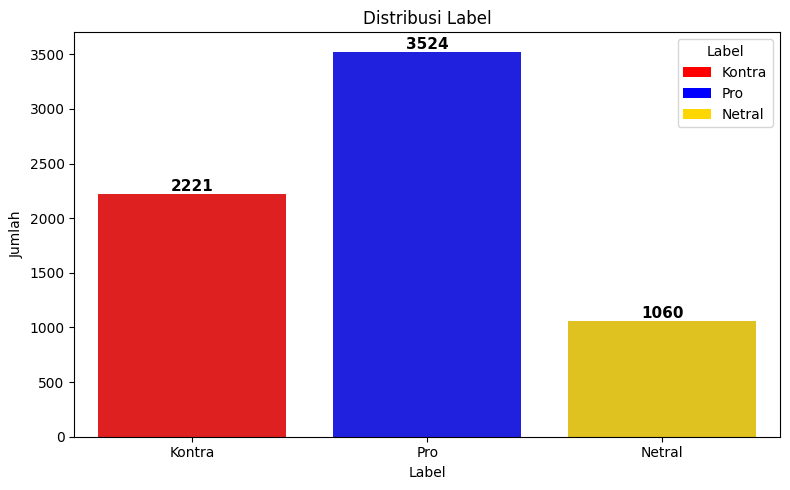

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': df['label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


**Word Cloud**

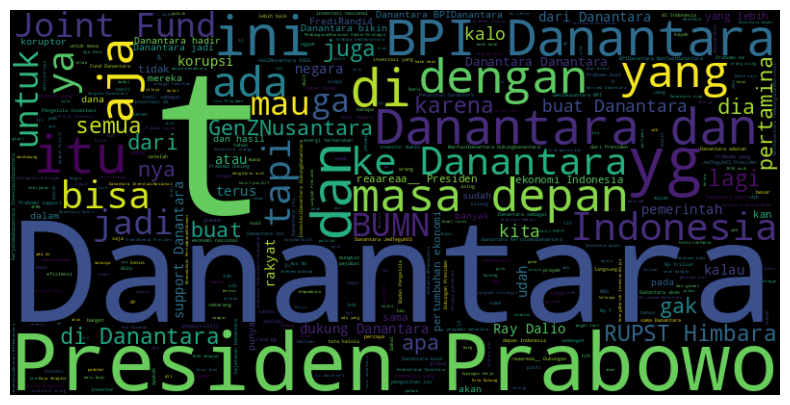

In [ ]:
#Word Cloud sebelum Preprocessing
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = ' '.join(df['Text_raw'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','co','RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


**Frekuensi Kata**

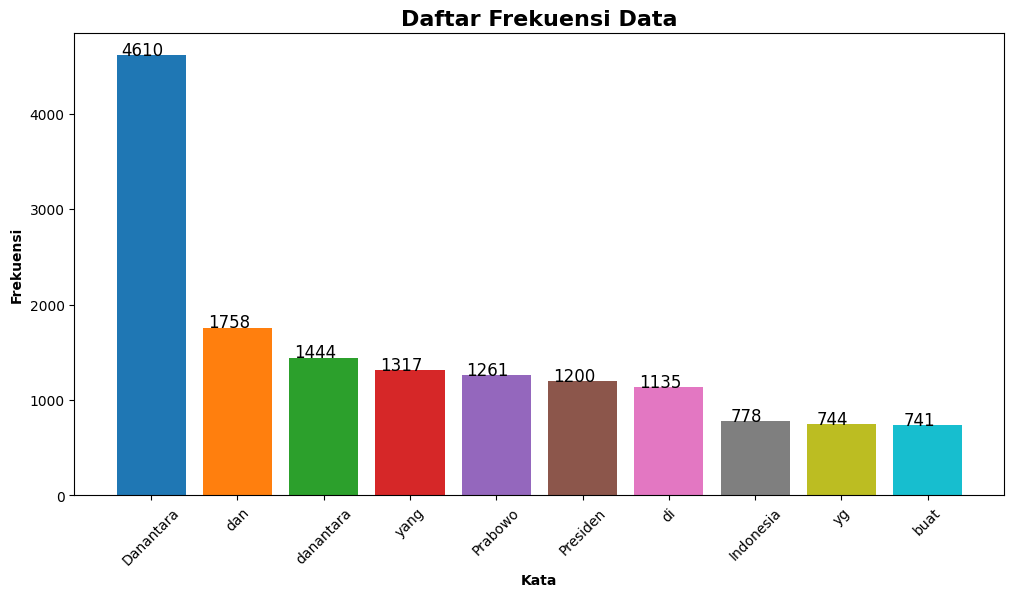

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Text_raw"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)

plt.xlabel('Kata', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.title('Daftar Frekuensi Data', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

for bar,num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12,color='black',ha='center')

plt.show()



**Pola Teks Dataset**

In [ ]:
import pandas as pd
import re
import string
import plotly.express as px

# Fungsi deteksi pola dalam teks
def detect_patterns(text):
    text = str(text)
    return {
        'HTML': bool(re.search(r'<.*?>', text)),
        'URL': bool(re.search(r'https?://\S+|www\.\S+', text)),
        'Mention': bool(re.search(r'@\w+', text)),
        'Hashtag': bool(re.search(r'#\w+', text)),
        'HTML Entity': bool(re.search(r'&\w+;', text)),
        'Emoji': bool(re.search(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            u"\U00002700-\U000027BF"
            u"\U000024C2-\U0001F251"
            "]+", text)),
        'Non-ASCII': any(ord(c) > 127 for c in text),
        'Punctuation': any(c in string.punctuation for c in text),
        'Extra Whitespace': bool(re.search(r'\s{2,}', text)),
    }

# Terapkan fungsi pada kolom teks
pattern_flags = df['Text_raw'].apply(detect_patterns)
pattern_df = pd.DataFrame(pattern_flags.tolist())

# Hitung jumlah kemunculan setiap pola
pattern_counts = pattern_df.sum().sort_values(ascending=False)
eda_summary = pd.DataFrame({'Jumlah Tweet': pattern_counts})

# Buat grafik batang
fig = px.bar(
    eda_summary,
    x=eda_summary.index,
    y='Jumlah Tweet',
    title='📌 Jumlah Tweet yang Mengandung Pola Tertentu',
    labels={'x': 'Jenis Pola', 'Jumlah Tweet': 'Jumlah'},
    color='Jumlah Tweet',
    color_continuous_scale='Viridis'
)

fig.update_traces(text=eda_summary['Jumlah Tweet'], textposition='outside')

fig.update_layout(
    width=900,
    height=500,
    xaxis_tickangle=-30,
    xaxis_title='Jenis Pola',
    yaxis_title='Jumlah Tweet',
    margin=dict(l=50, r=50, t=80, b=100)
)

fig.show()


#IndoBERT DANANTARA tanpa Under Samling

In [ ]:
label3_indobert = df.copy(deep=True)

**PreProcessing IndoBERT**

In [ ]:
import re
import string

def clean_text_twitter(text):
    text = str(text)

    # Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Hapus mention
    text = re.sub(r'@\w+', '', text)

    # Hapus hanya tanda pagar (#) dari hashtag, tapi simpan katanya
    text = re.sub(r'#', '', text)

    # Ganti &amp dan HTML entities
    text = re.sub(r'&amp;', 'dan', text)
    text = re.sub(r'&\w+;', '', text)

    # Hapus emoji dan simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002700-\U000027BF"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)

    # Hapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text)

    return text.strip()


label3_indobert['Text'] = label3_indobert['Text_raw'].apply(clean_text_twitter)


In [ ]:
label3_indobert.drop_duplicates(subset ="Text", keep = 'first', inplace = True)

In [ ]:
label3_indobert.head()

,Text_raw,Label,Text
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...


In [ ]:
label3_indobert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 7198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text_raw  6323 non-null   object
 1   Label     6323 non-null   int64 
 2   Text      6323 non-null   object
dtypes: int64(1), object(2)
memory usage: 197.6+ KB


**Distribusi Label Setelah Preprocesing**

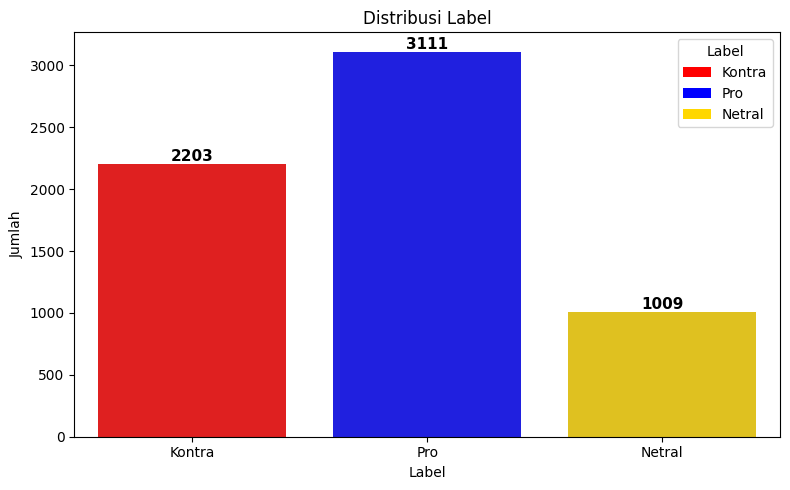

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': label3_indobert['Label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


**Device**

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


**Tokenizing**

In [ ]:
!pip install -U transformers

In [ ]:
# Load model directly
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
label3_indobert = label3_indobert.reset_index(drop=True)
label3_indobert['data_index'] = label3_indobert.index

In [ ]:
import numpy as np
import torch

def preprocess_data(dataset, text_col='Text', label_col='Label', max_length=256):
    encoding = tokenizer(
        dataset[text_col].tolist(),
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )
    labels_array = dataset[label_col].values
    labels_tensor = torch.tensor(labels_array, dtype=torch.long)
    encoding["labels"] = labels_tensor
    encoding["indices"] = torch.tensor(dataset["data_index"].values)  # Simpan index asli
    return encoding


In [ ]:
encoding = preprocess_data(label3_indobert)

In [ ]:
# Menampilkan hasil input untuk model BERT,
print("Input IDs:\n", encoding['input_ids'])
print("Attention Masks:\n", encoding['attention_mask'])

Input IDs:
 tensor([[    2,  4364, 13491,  ...,     0,     0,     0],
        [    2, 21780,    95,  ...,     0,     0,     0],
        [    2,  6247,  1869,  ...,     0,     0,     0],
        ...,
        [    2,  2855,  2973,  ...,     0,     0,     0],
        [    2,  4988,  1121,  ...,     0,     0,     0],
        [    2,  1775,  4581,  ...,     0,     0,     0]])
Attention Masks:
 tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


In [ ]:
# Decode hasil tokenisasi (hanya yang sudah dibersihkan)
decoded_texts = []
for input_id in encoding['input_ids']:
    decoded_text = tokenizer.decode(input_id, skip_special_tokens=True)
    decoded_texts.append(decoded_text)

# Buat DataFrame hasil decode
decoded_df = pd.DataFrame({'Decoded Text': decoded_texts})

# Lihat beberapa hasil
print(decoded_df.head())


                                        Decoded Text
0  hebat nkri gaya mafioso apabila ada bank yang ...
1  hashim kasih bocoran duit danantara akan dipak...
2  nasib danantara ke depan jadi tanda tanya besa...
3  ini episode seru pandu syahrir putra bang ciil...
4  rosan roeslani yakin peluncuran bp danantara b...


**Transformasi Tensor**



In [ ]:
from torch.utils.data import Dataset

class CustomTorchDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels, indices):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels.clone().detach()
        self.indices = indices.clone().detach()

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx],
            'indices': self.indices[idx]
        }

    def __len__(self):
        return len(self.input_ids)




**Splitting Dataset 70% Training, 15% Validasi dan 15% Testing Tanpa Under Sampling**

In [ ]:
from sklearn.model_selection import train_test_split


# Membuat dataset
input_ids = encoding['input_ids']
attention_masks = encoding['attention_mask']
labels = encoding['labels']
indices = encoding["indices"]

train_input_ids, temp_input_ids, train_attention_masks, temp_attention_masks, train_labels, temp_labels, train_indices, temp_indices = train_test_split(
    input_ids, attention_masks, labels, indices,
    test_size=0.3, stratify=labels, random_state=42
)

val_input_ids, test_input_ids, val_attention_masks, test_attention_masks, val_labels, test_labels, val_indices, test_indices = train_test_split(
    temp_input_ids, temp_attention_masks, temp_labels, temp_indices,
    test_size=0.5, stratify=temp_labels, random_state=42
)

train_dataset = CustomTorchDataset(train_input_ids, train_attention_masks, train_labels, train_indices)
val_dataset = CustomTorchDataset(val_input_ids, val_attention_masks, val_labels, val_indices)
test_dataset = CustomTorchDataset(test_input_ids, test_attention_masks, test_labels, test_indices)

**Distribusi Label**

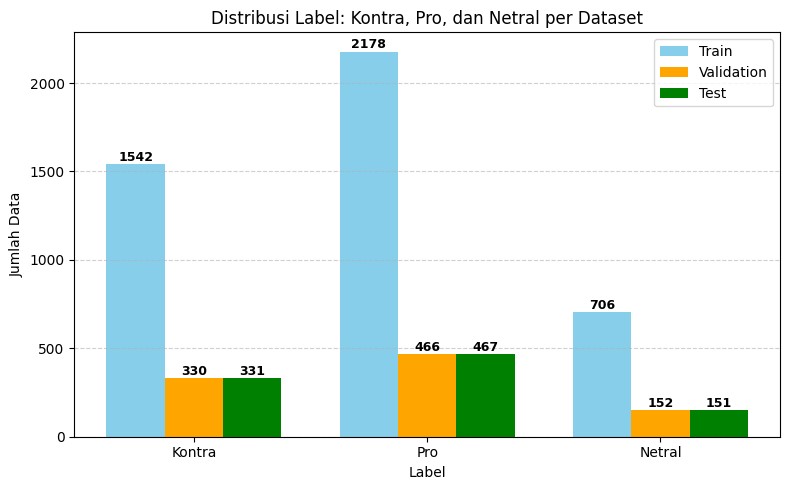

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Ambil distribusi label
train_dist = Counter(train_labels.numpy())
val_dist   = Counter(val_labels.numpy())
test_dist  = Counter(test_labels.numpy())

# Gunakan label yang bermakna
label_ids = [0, 1, 2]
label_names = ['Kontra', 'Pro', 'Netral']

train_vals = [train_dist.get(l, 0) for l in label_ids]
val_vals   = [val_dist.get(l, 0) for l in label_ids]
test_vals  = [test_dist.get(l, 0) for l in label_ids]

bar_width = 0.25
x = range(len(label_ids))
x_train = [i - bar_width for i in x]
x_val   = x
x_test  = [i + bar_width for i in x]

# Plot grafik batang
plt.figure(figsize=(8, 5))
bars_train = plt.bar(x_train, train_vals, width=bar_width, label='Train', color='skyblue')
bars_val   = plt.bar(x_val, val_vals, width=bar_width, label='Validation', color='orange')
bars_test  = plt.bar(x_test, test_vals, width=bar_width, label='Test', color='green')

for bars in [bars_train, bars_val, bars_test]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            str(height),
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

plt.xticks(x, label_names)
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Label: Kontra, Pro, dan Netral per Dataset')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Distribusi Dataset**

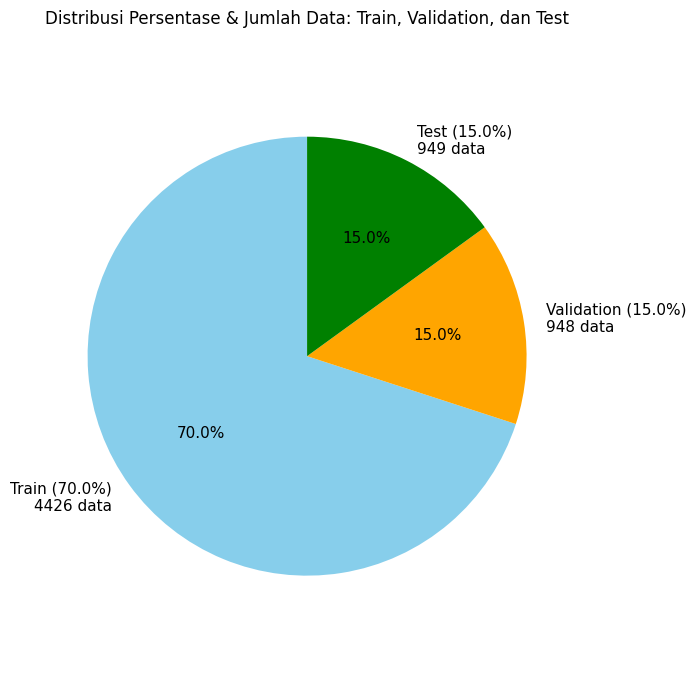

In [ ]:
import matplotlib.pyplot as plt

# Contoh jumlah data (ganti sesuai dataset kamu)
train_size = len(train_dataset)
val_size = len(val_dataset)
test_size = len(test_dataset)

# Total data
total_size = train_size + val_size + test_size

# Hitung persentase
train_pct = train_size / total_size * 100
val_pct = val_size / total_size * 100
test_pct = test_size / total_size * 100

# Data untuk pie chart
sizes = [train_pct, val_pct, test_pct]
labels = [
    f'Train ({train_pct:.1f}%)\n{train_size} data',
    f'Validation ({val_pct:.1f}%)\n{val_size} data',
    f'Test ({test_pct:.1f}%)\n{test_size} data'
]
colors = ['skyblue', 'orange', 'green']

# Buat pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    textprops=dict(color="black", fontsize=11, fontweight='normal')
)

# Judul
plt.title("Distribusi Persentase & Jumlah Data: Train, Validation, dan Test", fontweight='normal')
plt.axis('equal')  # Membuat lingkaran simetris
plt.tight_layout()
plt.show()


**Dataloader**

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size)  # Training
val_loader = DataLoader(val_dataset, batch_size=batch_size)     # Validation
test_loader = DataLoader(test_dataset, batch_size=batch_size)   # Testing

**Load Model Indobert Untuk Dataset Indobert dengan distribusi 70% Training, 15% Validasi dan 15% Testing Tanpa Under Sampling**

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3
)

model.to(device)
print(model)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

**Training IndoBert 70% Training, 15% Validasi dan 15% Testing Tanpa Under Sampling**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

# === Evaluation Function ===
def evaluate_model(model, eval_loader, device):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in eval_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)

    return accuracy, f1, precision, recall

# === FIXED: Loss computation ===
def compute_loss(model, dataloader, loss_function, device):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_function(logits, labels)
            total_loss += loss.item()

    return total_loss / len(dataloader)

# === Training Function ===
def train_model(model, tokenizer, train_loader, val_loader, loss_function, optimizer, num_epochs, device, patience=3):
    train_accuracies, val_accuracies = [], []
    train_losses, val_losses = [], []
    f1s, precisions, recalls = [], [], []

    best_val_accuracy = 0.0
    best_model_state = None
    patience_counter = 0
    best_epoch = 0

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

        for batch in train_loader_tqdm:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_function(logits, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            train_loader_tqdm.set_postfix(loss=loss.item())

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Evaluasi pada data training
        train_acc, _, _, _ = evaluate_model(model, train_loader, device)
        train_accuracies.append(train_acc)

        # Evaluasi pada data validasi
        val_acc, val_f1, val_prec, val_rec = evaluate_model(model, val_loader, device)
        val_loss = compute_loss(model, val_loader, loss_function, device)

        val_accuracies.append(val_acc)
        val_losses.append(val_loss)
        f1s.append(val_f1)
        precisions.append(val_prec)
        recalls.append(val_rec)

        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc*100:.2f}%")
        print(f"Val   Loss: {val_loss:.4f}, Acc: {val_acc*100:.2f}%, F1: {val_f1:.4f}, Prec: {val_prec:.4f}, Recall: {val_rec:.4f}")

        # Early Stopping
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            best_model_state = model.state_dict()
            best_epoch = epoch + 1
            patience_counter = 0
            print(f"📈 Validasi akurasi meningkat ke {best_val_accuracy*100:.2f}% → model disimpan (epoch {best_epoch})")
        else:
            patience_counter += 1
            print(f"Patience: {patience_counter}/{patience}")
            if patience_counter >= patience:
                print("⛔ Early stopping karena tidak ada peningkatan.")
                break

    # Simpan model terbaik (FULL model + tokenizer)
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        save_dir = "indobert-3"
        model.save_pretrained(save_dir)
        tokenizer.save_pretrained(save_dir)
        print(f"💾 Model & tokenizer disimpan ke folder: {save_dir}")

    # Grafik Training
    epochs = list(range(1, len(train_accuracies)+1))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, [a * 100 for a in train_accuracies], label='Train Accuracy (%)', marker='o', color='blue')
    plt.plot(epochs, train_losses, label='Train Loss', marker='s', color='red')
    plt.title('Training Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Grafik Validation
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, [a * 100 for a in val_accuracies], label='Validation Accuracy (%)', marker='x', color='green')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='^', color='orange')
    plt.title('Validation Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Ringkasan akhir
    df_summary = pd.DataFrame({
        'Epoch': epochs,
        'Train Loss': train_losses,
        'Train Acc': train_accuracies,
        'Val Loss': val_losses,
        'Val Acc': val_accuracies,
        'F1 Score': f1s,
        'Precision': precisions,
        'Recall': recalls
    })
    print("\n📊 Ringkasan Training:")
    print(df_summary.round(4).to_string(index=False))
    df_summary.to_csv("Indobert-3-summary.csv", index=False)



========================================= INDOBERT TANPA UNDERSAMPLING =========================================



Epoch 1/10
Train Loss: 0.0430, Train Acc: 99.23%
Val   Loss: 0.7920, Acc: 83.33%, F1: 0.7629, Prec: 0.7893, Recall: 0.7508
📈 Validasi akurasi meningkat ke 83.33% → model disimpan (epoch 1)



Epoch 2/10
Train Loss: 0.0472, Train Acc: 99.30%
Val   Loss: 0.6879, Acc: 84.49%, F1: 0.7697, Prec: 0.8012, Recall: 0.7616
📈 Validasi akurasi meningkat ke 84.49% → model disimpan (epoch 2)



Epoch 3/10
Train Loss: 0.0312, Train Acc: 99.77%
Val   Loss: 0.7380, Acc: 84.28%, F1: 0.7862, Prec: 0.7940, Recall: 0.7806
Patience: 1/3



Epoch 4/10
Train Loss: 0.0130, Train Acc: 99.89%
Val   Loss: 0.7793, Acc: 84.60%, F1: 0.7989, Prec: 0.7931, Recall: 0.8072
📈 Validasi akurasi meningkat ke 84.60% → model disimpan (epoch 4)



Epoch 5/10
Train Loss: 0.0053, Train Acc: 99.93%
Val   Loss: 0.7912, Acc: 85.02%, F1: 0.8030, Prec: 0.7989, Recall: 0.8080
📈 Validasi akurasi meningkat ke 85.02% → model disimpan (epoch 5)



Epoch 6/10
Train Loss: 0.0038, Train Acc: 99.89%
Val   Loss: 0.9486, Acc: 84.81%, F1: 0.8026, Prec: 0.7988, Recall: 0.8119
Patience: 1/3



Epoch 7/10
Train Loss: 0.0326, Train Acc: 99.62%
Val   Loss: 0.7865, Acc: 84.70%, F1: 0.7921, Prec: 0.7896, Recall: 0.7958
Patience: 2/3



Epoch 8/10
Train Loss: 0.0232, Train Acc: 99.86%
Val   Loss: 0.7910, Acc: 82.59%, F1: 0.7690, Prec: 0.7673, Recall: 0.7721
Patience: 3/3
⛔ Early stopping karena tidak ada peningkatan.
💾 Model & tokenizer disimpan ke folder: indobert-3


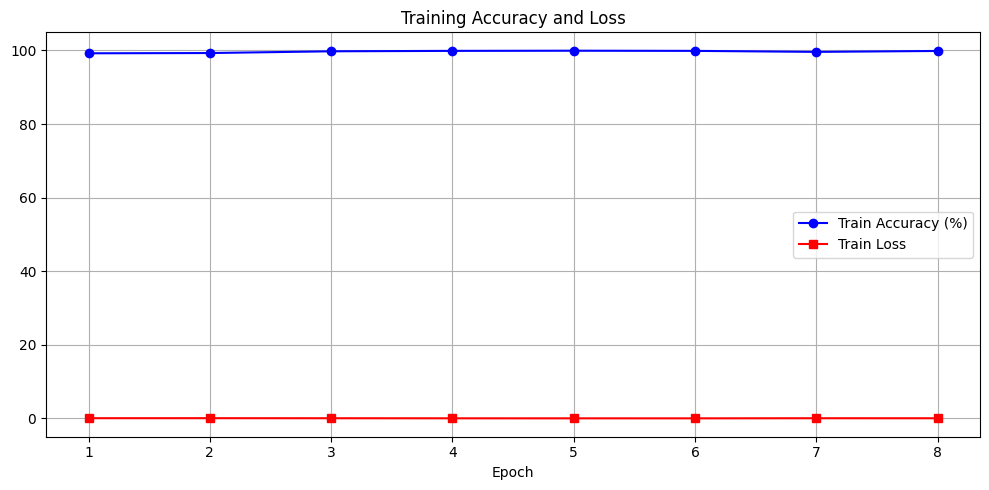

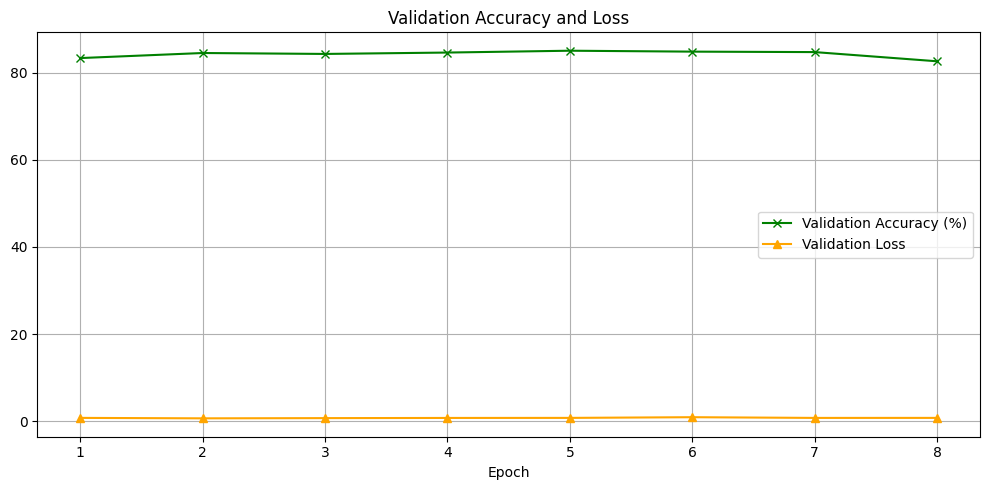


📊 Ringkasan Training:
 Epoch  Train Loss  Train Acc  Val Loss  Val Acc  F1 Score  Precision  Recall
     1      0.0430     0.9923    0.7920   0.8333    0.7629     0.7893  0.7508
     2      0.0472     0.9930    0.6879   0.8449    0.7697     0.8012  0.7616
     3      0.0312     0.9977    0.7380   0.8428    0.7862     0.7940  0.7806
     4      0.0130     0.9989    0.7793   0.8460    0.7989     0.7931  0.8072
     5      0.0053     0.9993    0.7912   0.8502    0.8030     0.7989  0.8080
     6      0.0038     0.9989    0.9486   0.8481    0.8026     0.7988  0.8119
     7      0.0326     0.9962    0.7865   0.8470    0.7921     0.7896  0.7958
     8      0.0232     0.9986    0.7910   0.8259    0.7690     0.7673  0.7721


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

print("========================================= INDOBERT TANPA UNDERSAMPLING =========================================")
train_model(model, tokenizer, train_loader, val_loader, loss_function, optimizer, num_epochs=10, device=device, patience=3)

**Testing dan Evaluasi IndoBert 70% Training, 15% Validasi dan 15% Testing Tanpa Under Sampling**

✅ Hasil prediksi disimpan ke CSV untuk IndoBERT Tanpa Under Sampling

📊 Overall Metrics:
Accuracy : 0.8535
F1 Score : 0.8086
Precision: 0.8112
Recall   : 0.8061


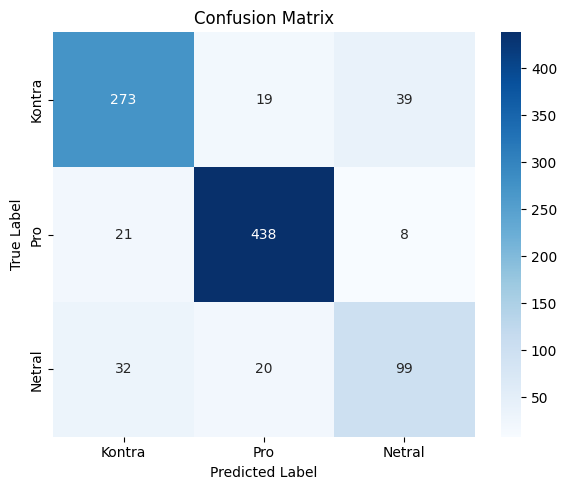


📄 Classification Report:
              precision    recall  f1-score   support

      Kontra       0.84      0.82      0.83       331
         Pro       0.92      0.94      0.93       467
      Netral       0.68      0.66      0.67       151

    accuracy                           0.85       949
   macro avg       0.81      0.81      0.81       949
weighted avg       0.85      0.85      0.85       949


🎯 ROC AUC (macro): 0.9374


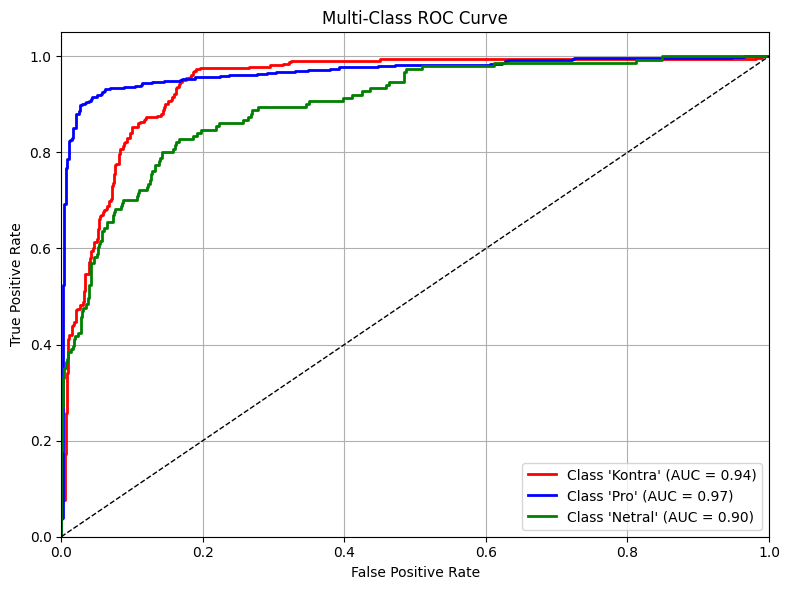

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# =============================
# Label mapping
# =============================
label_names = ["Kontra", "Pro", "Netral"]

# =============================
# Evaluasi pada Data Test
# =============================
model.eval()
all_preds, all_labels, all_logits, all_indices = [], [], [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        indices = batch['indices'].cpu().numpy()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_logits.extend(logits.cpu().numpy())
        all_indices.extend(indices)

# Konversi ke numpy
y_true = np.array(all_labels)
y_pred = np.array(all_preds)
y_probs = np.array(all_logits)

# =============================
# Ambil teks asli dan bersih
# =============================
texts_raw = label3_indobert.loc[all_indices].reset_index(drop=True)['Text_raw'].values
texts_clean = label3_indobert.loc[all_indices].reset_index(drop=True)['Text'].values
correct_flags = [t == p for t, p in zip(y_true, y_pred)]  # True/False

# =============================
# Simpan ke DataFrame (angka saja)
# =============================
predictions_df = pd.DataFrame({
    'Text': texts_raw,
    'Text Clean': texts_clean,
    'Label': y_true,
    'Predicted Label': y_pred,
    'Correct': correct_flags
})[['Text', 'Text Clean', 'Label', 'Predicted Label', 'Correct']]

# Urutkan agar salah prediksi muncul di atas
predictions_df = predictions_df.sort_values(by='Correct', ascending=True).reset_index(drop=True)

# Simpan ke file
predictions_df.to_csv("hasil_prediksi_indobert_label3.csv", index=False)

print("✅ Hasil prediksi disimpan ke CSV untuk IndoBERT Tanpa Under Sampling")

# =============================
# Overall Evaluation Metrics
# =============================
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print("\n📊 Overall Metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")


# =============================
# Confusion Matrix
# =============================
cm_test = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# =============================
# Classification Report
# =============================
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_names))

# =============================
# ROC AUC (Multiclass)
# =============================
try:
    y_true_onehot = label_binarize(y_true, classes=[0, 1, 2])
    roc_auc = roc_auc_score(y_true_onehot, y_probs, average='macro', multi_class='ovr')
    print(f"\n🎯 ROC AUC (macro): {roc_auc:.4f}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green']
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_probs[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], lw=2,
                 label=f"Class '{label_names[i]}' (AUC = {auc_score:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-Class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("roc_curve_multiclass_Label3_indobert.png")
    plt.show()

except Exception as e:
    print(f"\n❌ ROC AUC tidak dapat dihitung: {e}")


#IndoBERT DANANTARA dengan Under Samling

In [ ]:
label3_indobert_undersampling = df.copy(deep=True)

**PreProcessing IndoBERT**

In [ ]:
import re
import string

def clean_text_twitter(text):
    text = str(text)

    # Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Hapus mention
    text = re.sub(r'@\w+', '', text)

    # Hapus hanya tanda pagar (#) dari hashtag, tapi simpan katanya
    text = re.sub(r'#', '', text)

    # Ganti &amp dan HTML entities
    text = re.sub(r'&amp;', 'dan', text)
    text = re.sub(r'&\w+;', '', text)

    # Hapus emoji dan simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002700-\U000027BF"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)

    # Hapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text)

    return text.strip()


label3_indobert_undersampling['Text'] = label3_indobert_undersampling['Text_raw'].apply(clean_text_twitter)


In [ ]:
label3_indobert_undersampling.drop_duplicates(subset ="Text", keep = 'first', inplace = True)

In [ ]:
label3_indobert_undersampling.head()

,Text_raw,Label,Text
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...


In [ ]:
label3_indobert_undersampling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 7198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text_raw  6323 non-null   object
 1   Label     6323 non-null   int64 
 2   Text      6323 non-null   object
dtypes: int64(1), object(2)
memory usage: 197.6+ KB


**Distribusi Label Sebelum Undersampling**

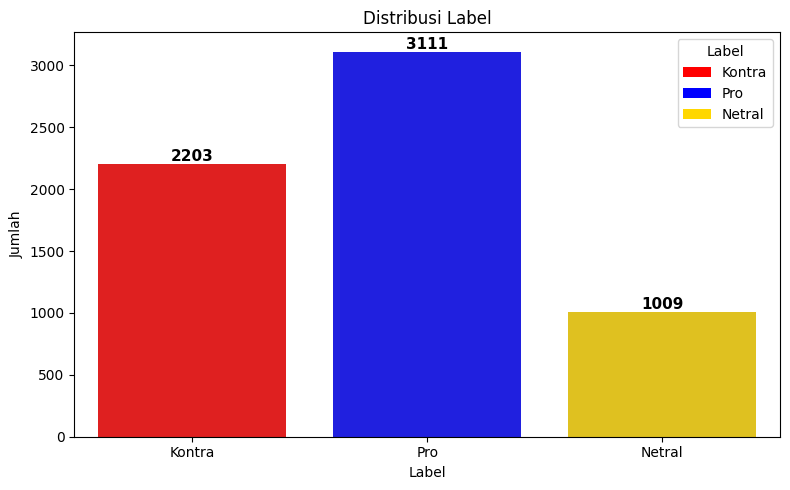

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': label3_indobert_undersampling['Label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


In [ ]:
# Pisahkan masing-masing kelas
df_kontra = label3_indobert_undersampling[label3_indobert_undersampling['Label'] == 0]
df_pro = label3_indobert_undersampling[label3_indobert_undersampling['Label'] == 1]
df_netral = label3_indobert_undersampling[label3_indobert_undersampling['Label'] == 2]

# Tentukan ukuran minimum (kelas minoritas)
min_size = min(len(df_kontra), len(df_pro), len(df_netral))

# Undersampling kedua kelas ke ukuran yang sama
df_kontra_balanced = df_kontra.sample(n=min_size, random_state=42)
df_pro_balanced = df_pro.sample(n=min_size, random_state=42)
df_netral_balanced = df_netral.sample(n=min_size, random_state=42)

# Gabungkan kembali
label3_indobert_undersampling = pd.concat([df_kontra_balanced, df_pro_balanced, df_netral_balanced]).sample(frac=1, random_state=42).reset_index(drop=True)

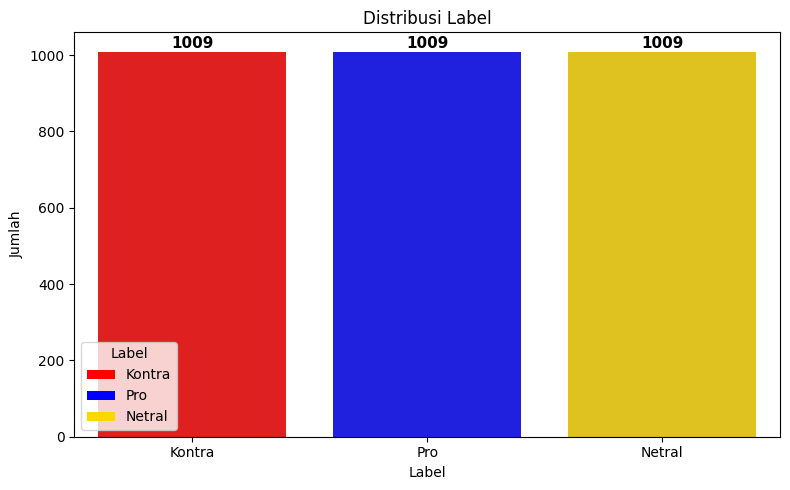

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': label3_indobert_undersampling['Label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


**Device**

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


**Tokenizing**

In [ ]:
!pip install -U transformers

In [ ]:
# Load model directly
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
label3_indobert_undersampling = label3_indobert_undersampling.reset_index(drop=True)
label3_indobert_undersampling['data_index'] = label3_indobert_undersampling.index

In [ ]:
import numpy as np
import torch

def preprocess_data(dataset, text_col='Text', label_col='Label', max_length=256):
    encoding = tokenizer(
        dataset[text_col].tolist(),
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )
    labels_array = dataset[label_col].values
    labels_tensor = torch.tensor(labels_array, dtype=torch.long)
    encoding["labels"] = labels_tensor
    encoding["indices"] = torch.tensor(dataset["data_index"].values)  # Simpan index asli
    return encoding


In [ ]:
encoding = preprocess_data(label3_indobert_undersampling)

In [ ]:
# Menampilkan hasil input untuk model BERT,
print("Input IDs:\n", encoding['input_ids'])
print("Attention Masks:\n", encoding['attention_mask'])

Input IDs:
 tensor([[    2,  1869, 12006,  ...,     0,     0,     0],
        [    2,  1869, 12006,  ...,     0,     0,     0],
        [    2,  2137,  2609,  ...,     0,     0,     0],
        ...,
        [    2,   472,   590,  ...,     0,     0,     0],
        [    2, 16357,    98,  ...,     0,     0,     0],
        [    2,  5847,  1292,  ...,     0,     0,     0]])
Attention Masks:
 tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


In [ ]:
# Decode hasil tokenisasi (hanya yang sudah dibersihkan)
decoded_texts = []
for input_id in encoding['input_ids']:
    decoded_text = tokenizer.decode(input_id, skip_special_tokens=True)
    decoded_texts.append(decoded_text)

# Buat DataFrame hasil decode
decoded_df = pd.DataFrame({'Decoded Text': decoded_texts})

# Lihat beberapa hasil
print(decoded_df.head())


                                        Decoded Text
0  danantara menjadi energi untuk masa depan indo...
1  danantara kalau salah manajemen siap2 jd penan...
2  udah berapa dosen cb di kelas yg bahas dananta...
3  danantara kepanjangan nya dana antara kamu dan...
4  lucu banget ada orang yg kemaren okegas garis ...


**Transformasi Tensor**



In [ ]:
from torch.utils.data import Dataset

class CustomTorchDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels, indices):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels.clone().detach()
        self.indices = indices.clone().detach()

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx],
            'indices': self.indices[idx]
        }

    def __len__(self):
        return len(self.input_ids)




**Splitting Dataset 70% Training, 15% Validasi dan 15% Testing Dengan Under Sampling**

In [ ]:
from sklearn.model_selection import train_test_split


# Membuat dataset
input_ids = encoding['input_ids']
attention_masks = encoding['attention_mask']
labels = encoding['labels']
indices = encoding["indices"]

train_input_ids, temp_input_ids, train_attention_masks, temp_attention_masks, train_labels, temp_labels, train_indices, temp_indices = train_test_split(
    input_ids, attention_masks, labels, indices,
    test_size=0.3, stratify=labels, random_state=42
)

val_input_ids, test_input_ids, val_attention_masks, test_attention_masks, val_labels, test_labels, val_indices, test_indices = train_test_split(
    temp_input_ids, temp_attention_masks, temp_labels, temp_indices,
    test_size=0.5, stratify=temp_labels, random_state=42
)

train_dataset = CustomTorchDataset(train_input_ids, train_attention_masks, train_labels, train_indices)
val_dataset = CustomTorchDataset(val_input_ids, val_attention_masks, val_labels, val_indices)
test_dataset = CustomTorchDataset(test_input_ids, test_attention_masks, test_labels, test_indices)

**Distribusi Label**

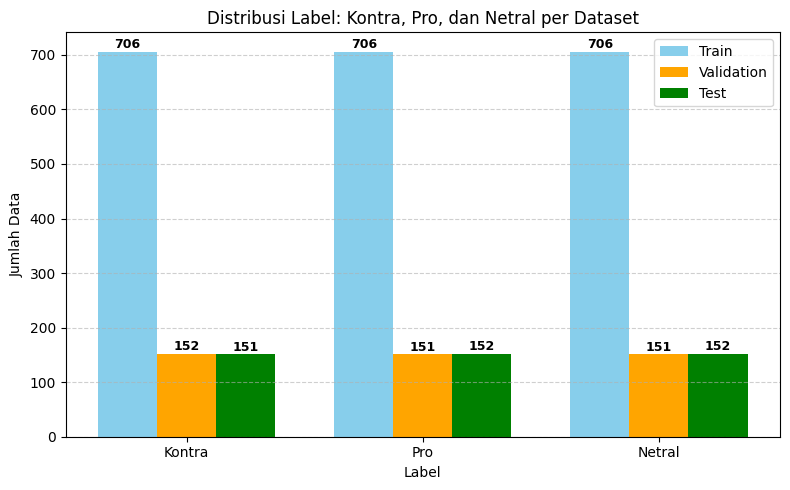

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Ambil distribusi label
train_dist = Counter(train_labels.numpy())
val_dist   = Counter(val_labels.numpy())
test_dist  = Counter(test_labels.numpy())

# Gunakan label yang bermakna
label_ids = [0, 1, 2]
label_names = ['Kontra', 'Pro', 'Netral']

train_vals = [train_dist.get(l, 0) for l in label_ids]
val_vals   = [val_dist.get(l, 0) for l in label_ids]
test_vals  = [test_dist.get(l, 0) for l in label_ids]

bar_width = 0.25
x = range(len(label_ids))
x_train = [i - bar_width for i in x]
x_val   = x
x_test  = [i + bar_width for i in x]

# Plot grafik batang
plt.figure(figsize=(8, 5))
bars_train = plt.bar(x_train, train_vals, width=bar_width, label='Train', color='skyblue')
bars_val   = plt.bar(x_val, val_vals, width=bar_width, label='Validation', color='orange')
bars_test  = plt.bar(x_test, test_vals, width=bar_width, label='Test', color='green')

for bars in [bars_train, bars_val, bars_test]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            str(height),
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

plt.xticks(x, label_names)
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Label: Kontra, Pro, dan Netral per Dataset')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Distribusi Dataset**

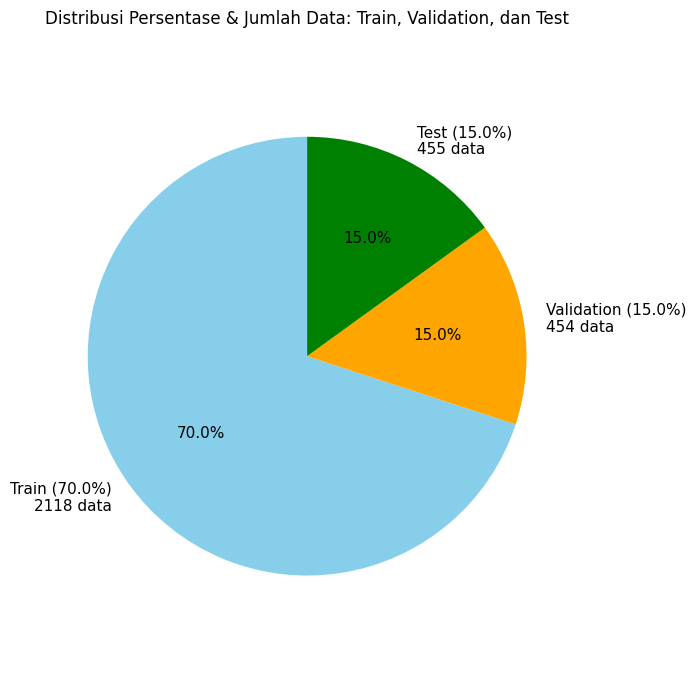

In [ ]:
import matplotlib.pyplot as plt

# Contoh jumlah data (ganti sesuai dataset kamu)
train_size = len(train_dataset)
val_size = len(val_dataset)
test_size = len(test_dataset)

# Total data
total_size = train_size + val_size + test_size

# Hitung persentase
train_pct = train_size / total_size * 100
val_pct = val_size / total_size * 100
test_pct = test_size / total_size * 100

# Data untuk pie chart
sizes = [train_pct, val_pct, test_pct]
labels = [
    f'Train ({train_pct:.1f}%)\n{train_size} data',
    f'Validation ({val_pct:.1f}%)\n{val_size} data',
    f'Test ({test_pct:.1f}%)\n{test_size} data'
]
colors = ['skyblue', 'orange', 'green']

# Buat pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    textprops=dict(color="black", fontsize=11, fontweight='normal')
)

# Judul
plt.title("Distribusi Persentase & Jumlah Data: Train, Validation, dan Test", fontweight='normal')
plt.axis('equal')  # Membuat lingkaran simetris
plt.tight_layout()
plt.show()


**Dataloader**

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size)  # Training
val_loader = DataLoader(val_dataset, batch_size=batch_size)     # Validation
test_loader = DataLoader(test_dataset, batch_size=batch_size)   # Testing

**Load Model Indobert Untuk Dataset Indobert dengan distribusi 70% Training, 15% Validasi dan 15% Testing Dengan Under Sampling**

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3
)

model.to(device)
print(model)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

**Training IndoBert 70% Training, 15% Validasi dan 15% Testing Dengan Under Sampling**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

# === Evaluation Function ===
def evaluate_model(model, eval_loader, device):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in eval_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)

    return accuracy, f1, precision, recall

# === FIXED: Loss computation ===
def compute_loss(model, dataloader, loss_function, device):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_function(logits, labels)
            total_loss += loss.item()

    return total_loss / len(dataloader)

# === Training Function ===
def train_model(model, tokenizer, train_loader, val_loader, loss_function, optimizer, num_epochs, device, patience=3):
    train_accuracies, val_accuracies = [], []
    train_losses, val_losses = [], []
    f1s, precisions, recalls = [], [], []

    best_val_accuracy = 0.0
    best_model_state = None
    patience_counter = 0
    best_epoch = 0

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

        for batch in train_loader_tqdm:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_function(logits, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            train_loader_tqdm.set_postfix(loss=loss.item())

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Evaluasi pada data training
        train_acc, _, _, _ = evaluate_model(model, train_loader, device)
        train_accuracies.append(train_acc)

        # Evaluasi pada data validasi
        val_acc, val_f1, val_prec, val_rec = evaluate_model(model, val_loader, device)
        val_loss = compute_loss(model, val_loader, loss_function, device)

        val_accuracies.append(val_acc)
        val_losses.append(val_loss)
        f1s.append(val_f1)
        precisions.append(val_prec)
        recalls.append(val_rec)

        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc*100:.2f}%")
        print(f"Val   Loss: {val_loss:.4f}, Acc: {val_acc*100:.2f}%, F1: {val_f1:.4f}, Prec: {val_prec:.4f}, Recall: {val_rec:.4f}")

        # Early Stopping
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            best_model_state = model.state_dict()
            best_epoch = epoch + 1
            patience_counter = 0
            print(f"📈 Validasi akurasi meningkat ke {best_val_accuracy*100:.2f}% → model disimpan (epoch {best_epoch})")
        else:
            patience_counter += 1
            print(f"Patience: {patience_counter}/{patience}")
            if patience_counter >= patience:
                print("⛔ Early stopping karena tidak ada peningkatan.")
                break

    # Simpan model terbaik (FULL model + tokenizer)
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        save_dir = "indobert-3-undersampling"
        model.save_pretrained(save_dir)
        tokenizer.save_pretrained(save_dir)
        print(f"💾 Model & tokenizer disimpan ke folder: {save_dir}")

    # Grafik Training
    epochs = list(range(1, len(train_accuracies)+1))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, [a * 100 for a in train_accuracies], label='Train Accuracy (%)', marker='o', color='blue')
    plt.plot(epochs, train_losses, label='Train Loss', marker='s', color='red')
    plt.title('Training Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Grafik Validation
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, [a * 100 for a in val_accuracies], label='Validation Accuracy (%)', marker='x', color='green')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='^', color='orange')
    plt.title('Validation Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Ringkasan akhir
    df_summary = pd.DataFrame({
        'Epoch': epochs,
        'Train Loss': train_losses,
        'Train Acc': train_accuracies,
        'Val Loss': val_losses,
        'Val Acc': val_accuracies,
        'F1 Score': f1s,
        'Precision': precisions,
        'Recall': recalls
    })
    print("\n📊 Ringkasan Training:")
    print(df_summary.round(4).to_string(index=False))
    df_summary.to_csv("Indobert-3-summary-undersampling.csv", index=False)



========================================= INDOBERT DENGAN UNDERSAMPLING =========================================



Epoch 1/10
Train Loss: 0.1002, Train Acc: 98.91%
Val   Loss: 0.9647, Acc: 77.97%, F1: 0.7724, Prec: 0.7825, Recall: 0.7796
📈 Validasi akurasi meningkat ke 77.97% → model disimpan (epoch 1)



Epoch 2/10
Train Loss: 0.0665, Train Acc: 99.81%
Val   Loss: 0.8389, Acc: 79.07%, F1: 0.7901, Prec: 0.7895, Recall: 0.7909
📈 Validasi akurasi meningkat ke 79.07% → model disimpan (epoch 2)



Epoch 3/10
Train Loss: 0.0086, Train Acc: 100.00%
Val   Loss: 0.9623, Acc: 79.52%, F1: 0.7930, Prec: 0.7941, Recall: 0.7952
📈 Validasi akurasi meningkat ke 79.52% → model disimpan (epoch 3)



Epoch 4/10
Train Loss: 0.0074, Train Acc: 99.95%
Val   Loss: 0.9440, Acc: 80.40%, F1: 0.8037, Prec: 0.8033, Recall: 0.8041
📈 Validasi akurasi meningkat ke 80.40% → model disimpan (epoch 4)



Epoch 5/10
Train Loss: 0.0063, Train Acc: 99.91%
Val   Loss: 0.9588, Acc: 81.28%, F1: 0.8121, Prec: 0.8116, Recall: 0.8129
📈 Validasi akurasi meningkat ke 81.28% → model disimpan (epoch 5)



Epoch 6/10
Train Loss: 0.0094, Train Acc: 99.91%
Val   Loss: 0.9808, Acc: 80.18%, F1: 0.8026, Prec: 0.8049, Recall: 0.8018
Patience: 1/3



Epoch 7/10
Train Loss: 0.0054, Train Acc: 100.00%
Val   Loss: 1.0208, Acc: 79.52%, F1: 0.7968, Prec: 0.7991, Recall: 0.7952
Patience: 2/3



Epoch 8/10
Train Loss: 0.0016, Train Acc: 100.00%
Val   Loss: 1.0766, Acc: 79.30%, F1: 0.7951, Prec: 0.7984, Recall: 0.7930
Patience: 3/3
⛔ Early stopping karena tidak ada peningkatan.
💾 Model & tokenizer disimpan ke folder: indobert-3-undersampling


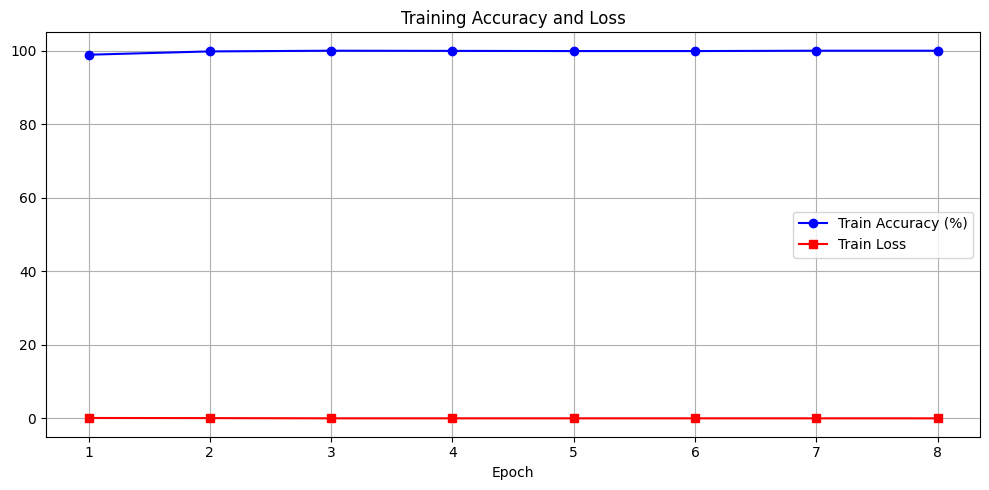

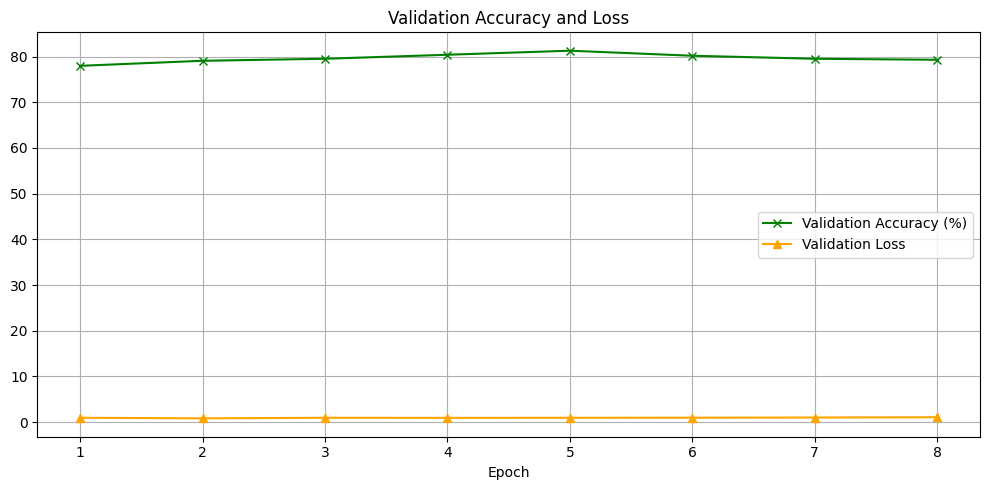


📊 Ringkasan Training:
 Epoch  Train Loss  Train Acc  Val Loss  Val Acc  F1 Score  Precision  Recall
     1      0.1002     0.9891    0.9647   0.7797    0.7724     0.7825  0.7796
     2      0.0665     0.9981    0.8389   0.7907    0.7901     0.7895  0.7909
     3      0.0086     1.0000    0.9623   0.7952    0.7930     0.7941  0.7952
     4      0.0074     0.9995    0.9440   0.8040    0.8037     0.8033  0.8041
     5      0.0063     0.9991    0.9588   0.8128    0.8121     0.8116  0.8129
     6      0.0094     0.9991    0.9808   0.8018    0.8026     0.8049  0.8018
     7      0.0054     1.0000    1.0208   0.7952    0.7968     0.7991  0.7952
     8      0.0016     1.0000    1.0766   0.7930    0.7951     0.7984  0.7930


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

print("========================================= INDOBERT DENGAN UNDERSAMPLING =========================================")
train_model(model, tokenizer, train_loader, val_loader, loss_function, optimizer, num_epochs=10, device=device, patience=3)

**Testing dan Evaluasi IndoBert 70% Training, 15% Validasi dan 15% Testing Dengan Under Sampling**

✅ Hasil prediksi disimpan ke CSV untuk IndoBERT Dengan Under Sampling

📊 Overall Metrics:
Accuracy : 0.8110
F1 Score : 0.8118
Precision: 0.8133
Recall   : 0.8110


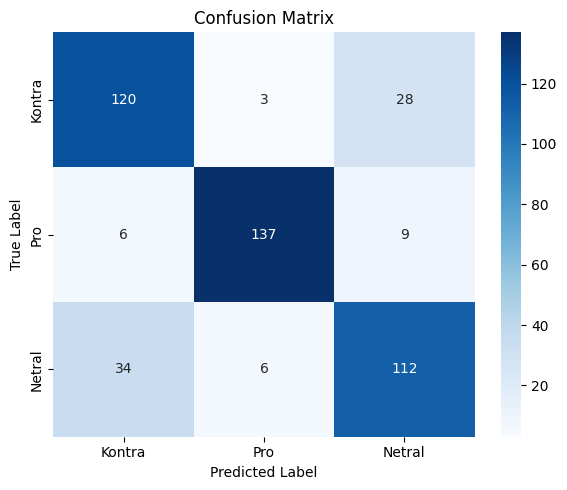


📄 Classification Report:
              precision    recall  f1-score   support

      Kontra       0.75      0.79      0.77       151
         Pro       0.94      0.90      0.92       152
      Netral       0.75      0.74      0.74       152

    accuracy                           0.81       455
   macro avg       0.81      0.81      0.81       455
weighted avg       0.81      0.81      0.81       455


🎯 ROC AUC (macro): 0.9226


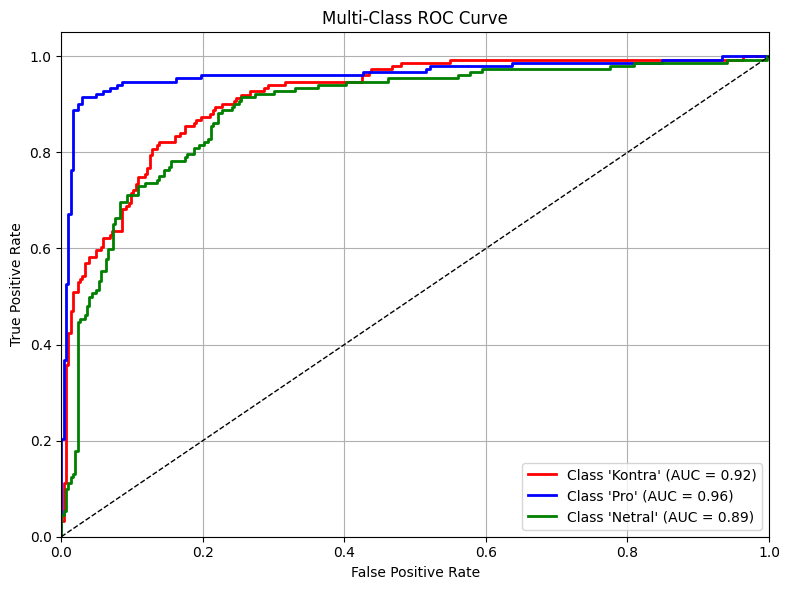

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# =============================
# Label mapping
# =============================
label_names = ["Kontra", "Pro", "Netral"]

# =============================
# Evaluasi pada Data Test
# =============================
model.eval()
all_preds, all_labels, all_logits, all_indices = [], [], [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        indices = batch['indices'].cpu().numpy()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_logits.extend(logits.cpu().numpy())
        all_indices.extend(indices)

# Konversi ke numpy
y_true = np.array(all_labels)
y_pred = np.array(all_preds)
y_probs = np.array(all_logits)

# =============================
# Ambil teks asli dan bersih
# =============================
texts_raw = label3_indobert_undersampling.loc[all_indices].reset_index(drop=True)['Text_raw'].values
texts_clean = label3_indobert_undersampling.loc[all_indices].reset_index(drop=True)['Text'].values
correct_flags = [t == p for t, p in zip(y_true, y_pred)]  # True/False

# =============================
# Simpan ke DataFrame (angka saja)
# =============================
predictions_df = pd.DataFrame({
    'Text': texts_raw,
    'Text Clean': texts_clean,
    'Label': y_true,
    'Predicted Label': y_pred,
    'Correct': correct_flags
})[['Text', 'Text Clean', 'Label', 'Predicted Label', 'Correct']]

# Urutkan agar salah prediksi muncul di atas
predictions_df = predictions_df.sort_values(by='Correct', ascending=True).reset_index(drop=True)

# Simpan ke file
predictions_df.to_csv("hasil_prediksi_indobert_label3_undersampling.csv", index=False)

print("✅ Hasil prediksi disimpan ke CSV untuk IndoBERT Dengan Under Sampling")

# =============================
# Overall Evaluation Metrics
# =============================
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print("\n📊 Overall Metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# =============================
# Confusion Matrix
# =============================
cm_test = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# =============================
# Classification Report
# =============================
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_names))

# =============================
# ROC AUC (Multiclass)
# =============================
try:
    y_true_onehot = label_binarize(y_true, classes=[0, 1, 2])
    roc_auc = roc_auc_score(y_true_onehot, y_probs, average='macro', multi_class='ovr')
    print(f"\n🎯 ROC AUC (macro): {roc_auc:.4f}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green']
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_probs[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], lw=2,
                 label=f"Class '{label_names[i]}' (AUC = {auc_score:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-Class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("roc_curve_multiclass_Label3_indobert_undersampling.png")
    plt.show()

except Exception as e:
    print(f"\n❌ ROC AUC tidak dapat dihitung: {e}")
